<a href="https://colab.research.google.com/github/AlexisDclqt/Code_Projet_Co2_/blob/main/Exploration_2024_SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pa

In [81]:
df_emissions_2024 = pd.read_parquet('/content/drive/MyDrive/Co2_2024_Clean_V2.1.parquet')
df_emissions_2024.head(10)

,ID,Country,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,IT,Erwltp (g/km),Fuel consumption,Electric range (km),Pays,Puissance_CV
0,148534149,NL,FORD,FOCUS,1523.0,121.0,petrol,92.0,0.0,E13 32 37,2.10,5.3,0.0,Netherlands,125.12
1,148534150,NL,OPEL,VIVARO,2454.0,0.0,electric,100.0,244.0,N/C,0.00,0.0,343.0,Netherlands,136.00
2,148534151,NL,VOLVO,S60,2176.0,16.0,petrol/electric,186.0,163.0,N/C,0.00,0.7,93.0,Netherlands,252.96
3,148534152,NL,FORD,FOCUS,1549.0,123.0,petrol,92.0,0.0,E13 32 37,2.10,5.4,0.0,Netherlands,125.12
4,148534153,NL,TOYOTA,TOYOTA AYGO X,1088.0,108.0,petrol,53.0,0.0,N/C,0.00,4.8,0.0,Netherlands,72.08
5,148534154,NL,DACIA,SANDERO,1262.0,125.0,petrol,81.0,0.0,E19 29 37,1.88,5.5,0.0,Netherlands,110.16
6,148534155,NL,VOLKSWAGEN,TIGUAN,2033.0,10.0,petrol/electric,110.0,178.0,N/C,0.00,0.4,117.0,Netherlands,149.60
7,148534156,NL,VOLKSWAGEN,TAIGO,1335.0,125.0,petrol,70.0,0.0,E13 29,1.18,5.6,0.0,Netherlands,95.20
8,148534157,NL,VOLVO,C40,2203.0,0.0,electric,185.0,166.0,N/C,0.00,0.0,570.0,Netherlands,251.60
9,148534158,NL,VOLVO,XC60,2272.0,22.0,petrol/electric,186.0,182.0,N/C,0.00,0.9,82.0,Netherlands,252.96


In [82]:
valeurs_distinctes_1 = df_emissions_2024['Type_Carburant'].unique()
print(valeurs_distinctes_1)

['petrol' 'electric' 'petrol/electric' 'lpg' 'diesel/electric' 'diesel'
 'e85' 'ng' 'hydrogen' 'unknown']


In [83]:
df_emissions_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10779273 entries, 0 to 10779272
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ID                   int64  
 1   Country              object 
 2   Constructeur         object 
 3   Model                object 
 4   WLTP_poids           float64
 5   Co2_Emission(WLTP)   float64
 6   Type_Carburant       object 
 7   Puissance_KW         float64
 8   Conso_Wh/km          float64
 9   IT                   object 
 10  Erwltp (g/km)        float64
 11  Fuel consumption     float64
 12  Electric range (km)  float64
 13  Pays                 object 
 14  Puissance_CV         float64
dtypes: float64(8), int64(1), object(6)
memory usage: 1.2+ GB


In [84]:
df_emissions_2024_lpg = df_emissions_2024[df_emissions_2024['Type_Carburant'] == 'lpg']
df_emissions_2024_lpg.head(5)

,ID,Country,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,IT,Erwltp (g/km),Fuel consumption,Electric range (km),Pays,Puissance_CV
152,148534301,NL,DACIA,SANDERO,1310.0,114.0,lpg,74.0,0.0,N/C,0.0,7.1,0.0,Netherlands,100.64
191,148534340,NL,DACIA,JOGGER,1461.0,120.0,lpg,74.0,0.0,N/C,0.0,7.8,0.0,Netherlands,100.64
330,148534479,NL,DACIA,SANDERO,1284.0,106.0,lpg,74.0,0.0,N/C,0.0,6.6,0.0,Netherlands,100.64
583,148534732,NL,DACIA,SANDERO,1285.0,106.0,lpg,74.0,0.0,N/C,0.0,6.6,0.0,Netherlands,100.64
713,148534862,NL,DACIA,JOGGER,1407.0,119.0,lpg,74.0,0.0,N/C,0.0,7.7,0.0,Netherlands,100.64


In [85]:
distinct_values = df_emissions_2024['Type_Carburant'].unique()
print(distinct_values)


['petrol' 'electric' 'petrol/electric' 'lpg' 'diesel/electric' 'diesel'
 'e85' 'ng' 'hydrogen' 'unknown']


In [86]:
df_emissions_2024_lpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321011 entries, 152 to 10779164
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   321011 non-null  int64  
 1   Country              321011 non-null  object 
 2   Constructeur         321011 non-null  object 
 3   Model                321011 non-null  object 
 4   WLTP_poids           319306 non-null  float64
 5   Co2_Emission(WLTP)   320761 non-null  float64
 6   Type_Carburant       321011 non-null  object 
 7   Puissance_KW         321009 non-null  float64
 8   Conso_Wh/km          321011 non-null  float64
 9   IT                   321011 non-null  object 
 10  Erwltp (g/km)        321011 non-null  float64
 11  Fuel consumption     321011 non-null  float64
 12  Electric range (km)  321011 non-null  float64
 13  Pays                 321011 non-null  object 
 14  Puissance_CV         321009 non-null  float64
dtypes: float64(8), int

In [87]:
missing_rate = df_emissions_2024_lpg.isna().mean() * 100
print(missing_rate)

ID                     0.000000
Country                0.000000
Constructeur           0.000000
Model                  0.000000
WLTP_poids             0.531134
Co2_Emission(WLTP)     0.077879
Type_Carburant         0.000000
Puissance_KW           0.000623
Conso_Wh/km            0.000000
IT                     0.000000
Erwltp (g/km)          0.000000
Fuel consumption       0.000000
Electric range (km)    0.000000
Pays                   0.000000
Puissance_CV           0.000623
dtype: float64


In [88]:
df_emissions_2024_lpg.duplicated().sum()

np.int64(0)

In [89]:
df_emissions_2024_lpg.isnull().sum(axis=0)

,0
ID,0
Country,0
Constructeur,0
Model,0
WLTP_poids,1705
Co2_Emission(WLTP),250
Type_Carburant,0
Puissance_KW,2
Conso_Wh/km,0
IT,0


In [90]:
# etude de la valeur lpg en fonction des colonnes du dataframe .




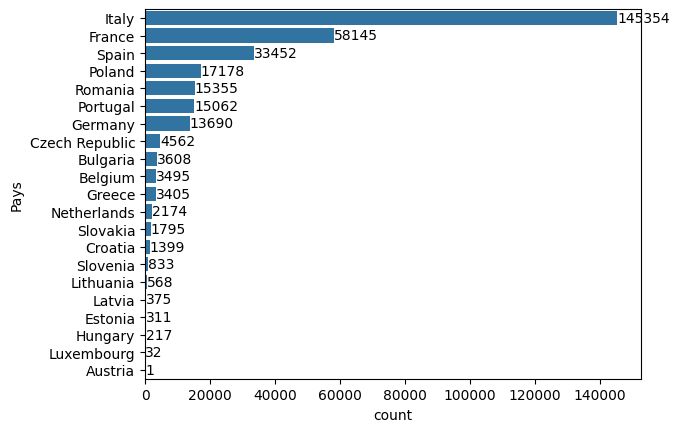

In [91]:
# lpg en focntion du pays (histogramme)
lpg_country =sns.countplot( y = 'Pays' , data = df_emissions_2024_lpg, order = df_emissions_2024_lpg['Pays'].value_counts(ascending=False).index)
abs_values = df_emissions_2024_lpg['Pays'].value_counts(ascending=False).values
lpg_country.bar_label(container=lpg_country.containers[0], labels=abs_values)
plt.show()

In [92]:
# On voit que l'italy est le pays qui represente le plus de voiture a type de carburant lpg, suivi de la France et de l'espagne.
# des recherches sur le site my lpg.eu https://www.mylpg.eu/stations/italy/list/ indique que l'italy recense le plus de station de recharge lpg
# le nombre de station est de 4880 pour l'italy , 1523 pour la france et 981 pour l'espagne.


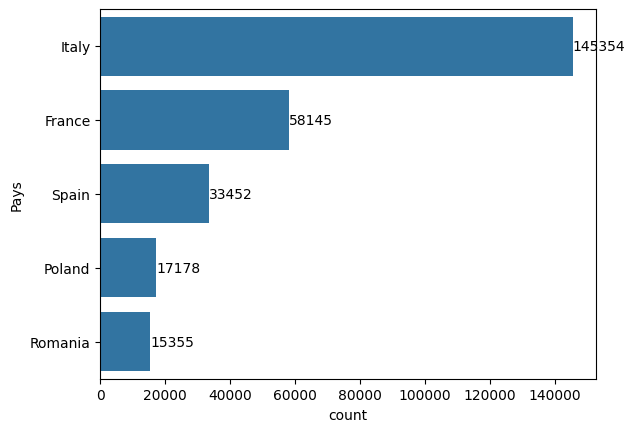

In [93]:
# 5 pays avec le plus de voiture lpg
lpg_country =sns.countplot( y = 'Pays' , data = df_emissions_2024_lpg, order = df_emissions_2024_lpg['Pays'].value_counts(ascending=False).iloc[:5].index)
abs_values = df_emissions_2024_lpg['Pays'].value_counts(ascending=False).iloc[:5].values
lpg_country.bar_label(container=lpg_country.containers[0], labels=abs_values)
plt.show()

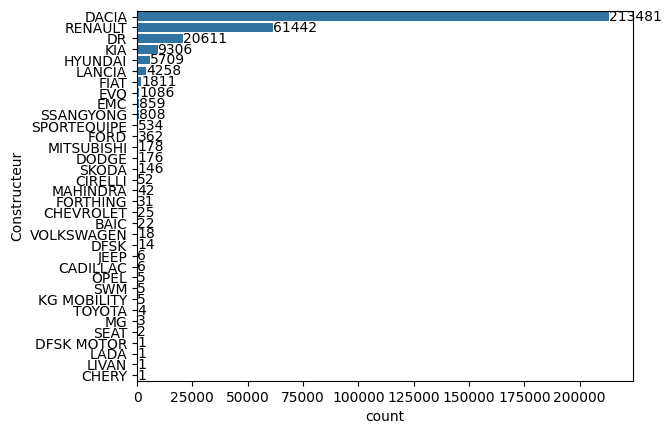

In [94]:
# analyse de la relation entre lpg et constructeur
lpg_constructeur =sns.countplot( y = 'Constructeur' , data = df_emissions_2024_lpg, order = df_emissions_2024_lpg['Constructeur'].value_counts(ascending=False).index)
abs_values = df_emissions_2024_lpg['Constructeur'].value_counts(ascending=False).values
lpg_constructeur.bar_label(container=lpg_constructeur.containers[0], labels=abs_values)
plt.show()

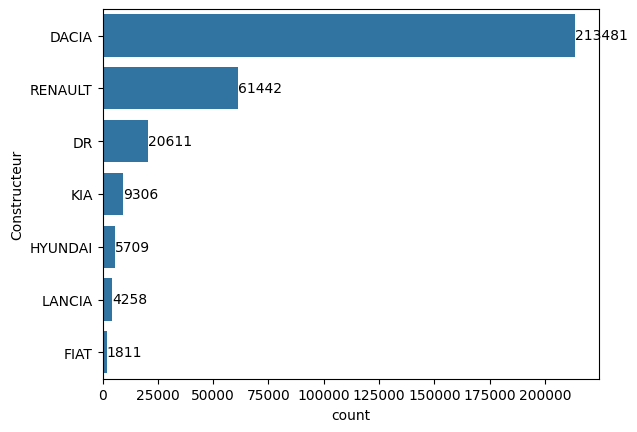

In [95]:
# 7 premier constructeurs.
lpg_constructeur =sns.countplot( y = 'Constructeur' , data = df_emissions_2024_lpg, order = df_emissions_2024_lpg['Constructeur'].value_counts(ascending=False).iloc[:7].index)
abs_values = df_emissions_2024_lpg['Constructeur'].value_counts(ascending=False).iloc[:7].values
lpg_constructeur.bar_label(container=lpg_constructeur.containers[0], labels=abs_values)
plt.show()

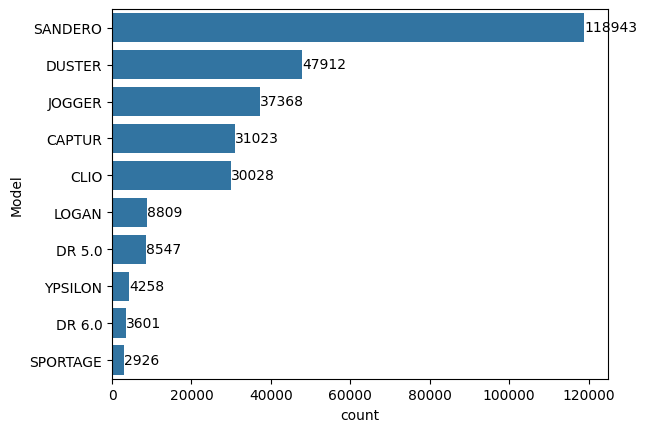

In [96]:
# 10 premier models qui ont pour essence du lpg
lpg_model =sns.countplot( y = 'Model' , data = df_emissions_2024_lpg, order = df_emissions_2024_lpg['Model'].value_counts(ascending=False).iloc[:10].index)
abs_values = df_emissions_2024_lpg['Model'].value_counts(ascending=False).iloc[:10].values
lpg_model.bar_label(container=lpg_model.containers[0], labels=abs_values)
plt.show()

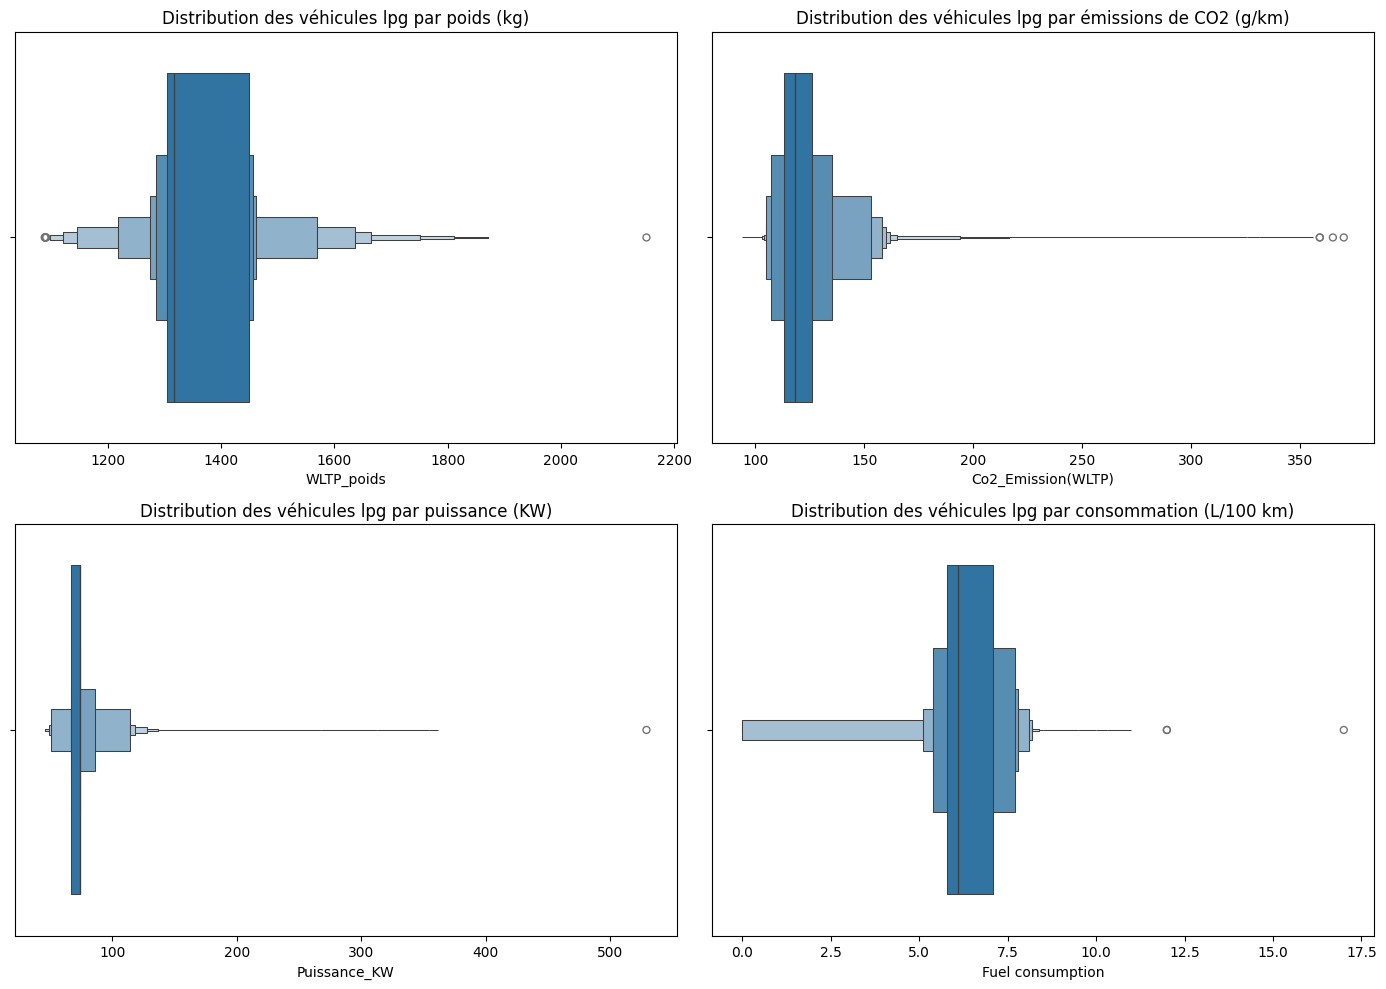

In [97]:
# boxplots pour analyser la distribution des variables
colonnes = ['WLTP_poids', 'Co2_Emission(WLTP)', 'Puissance_KW', 'Fuel consumption']
titres = [
    'Distribution des véhicules lpg par poids (kg)',
    'Distribution des véhicules lpg par émissions de CO2 (g/km)',
    'Distribution des véhicules lpg par puissance (KW)',
    'Distribution des véhicules lpg par consommation (L/100 km)'
]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(colonnes):
    sns.boxenplot(x=col, data= df_emissions_2024_lpg, ax=axes[i])
    axes[i].set_title(titres[i])

plt.tight_layout()
plt.show()

In [98]:
# recherhce sur les differents outliers.

In [99]:
df_emissions_2024_lpg[(df_emissions_2024_lpg['Co2_Emission(WLTP)'] >= 350)]


,ID,Country,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,IT,Erwltp (g/km),Fuel consumption,Electric range (km),Pays,Puissance_CV
804286,151772952,DE,DODGE,DODGE DURANGO R/T,NaN,356.0,lpg,268.0,0.0,N/C,0.0,0.0,0.0,Germany,364.48
1204228,152322938,DE,DODGE,DODGE DURANGO R/T,NaN,359.0,lpg,268.0,0.0,N/C,0.0,0.0,0.0,Germany,364.48
3443204,151307451,DE,DODGE,DODGE DURANGO R/T,NaN,359.0,lpg,268.0,0.0,N/C,0.0,0.0,0.0,Germany,364.48
3739810,151204085,DE,DODGE,DODGE DURANGO R/T,NaN,356.0,lpg,268.0,0.0,N/C,0.0,0.0,0.0,Germany,364.48
3750762,151215038,DE,DODGE,DURANGO SRT HELLCAT,NaN,365.0,lpg,529.0,0.0,N/C,0.0,0.0,0.0,Germany,719.44
3761029,151225306,DE,CHEVROLET,SUBURBAN HIGH COUNTRY,NaN,370.0,lpg,313.0,0.0,N/C,0.0,0.0,0.0,Germany,425.68


In [100]:
df_emissions_2024_lpg[(df_emissions_2024_lpg['WLTP_poids'] >= 2000)]


,ID,Country,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,IT,Erwltp (g/km),Fuel consumption,Electric range (km),Pays,Puissance_CV
8398066,157149931,CZ,DACIA,DUSTER,2151.0,144.0,lpg,67.0,0.0,E9 29 37,1.7,6.4,0.0,Czech Republic,91.12


In [101]:
df_emissions_2024_lpg[(df_emissions_2024_lpg['Puissance_KW'] >= 500)]


,ID,Country,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,IT,Erwltp (g/km),Fuel consumption,Electric range (km),Pays,Puissance_CV
3750762,151215038,DE,DODGE,DURANGO SRT HELLCAT,NaN,365.0,lpg,529.0,0.0,N/C,0.0,0.0,0.0,Germany,719.44


In [102]:
df_emissions_2024_lpg[(df_emissions_2024_lpg['Fuel consumption'] >= 11.5)]

,ID,Country,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,IT,Erwltp (g/km),Fuel consumption,Electric range (km),Pays,Puissance_CV
2791160,149746663,GR,DACIA,SANDERO,1306.0,114.0,lpg,74.0,0.0,E9 29 37,1.7,17.0,0.0,Greece,100.64
8193768,158465462,PL,DACIA,JOGGER,1377.0,134.0,lpg,67.0,0.0,N/C,0.0,12.0,0.0,Poland,91.12
8804017,158655900,PL,DACIA,DUSTER,1413.0,143.0,lpg,67.0,0.0,N/C,0.0,12.0,0.0,Poland,91.12


# Analyse des boites a moustaches et nettoyage des outliers.

**Poids** On remarque la presence d'un outlier pour le poids des vehicules LPG a plus de 2000kg que l'on va eliminer de notre jeu de données car cela correspond a une dacia duster qui normalement doit peser autour de 1300kg

**Emissions de CO2** On remarque plusieurs outlier au dessus de la valeur maximal de 350 g/km. Apés recherhce cela correspond a de gros voitures a forte puissance, donc ne representant pas des valeurs abherentes. On va donc les laissés dans le jeux de données.

**Puissance** On remarque que il y a la presence d'un outlier a plus d'un vehicule a forte puissance plus de 500. Cette valeur correspond bien a une voiture réelle avec une capacité a produire cette puissance après recherhce, nous decidons de pas suprimé cette valeurs car elle n'est pas abberante.

**Consommation** On remarque 3 outliers dans la consommation des vehicules ( apres recherche dans le dataset). Ces valeurs representent des valeurs abhérentes que l'on va supprimer de notre jeu de données. On remarque aussi une forte representation de valeurs proche de zero.



In [103]:
df_emissions_2024_lpg=df_emissions_2024_lpg.drop(df_emissions_2024_lpg[(df_emissions_2024_lpg['WLTP_poids'] >= 2000)].index)

In [104]:
df_emissions_2024_lpg=df_emissions_2024_lpg.drop(df_emissions_2024_lpg[(df_emissions_2024_lpg['Fuel consumption'] >= 12)].index)

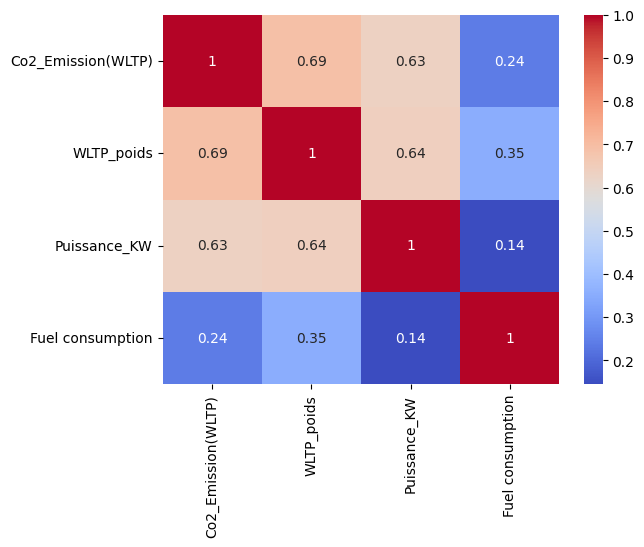

In [105]:
# Matrice de corrélation (heatmap) entre les variables numériques pour voiture a essence lpg

numeric_vars = ['Co2_Emission(WLTP)', 'WLTP_poids', 'Puissance_KW', 'Fuel consumption']
corr_matrix = df_emissions_2024_lpg[numeric_vars].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

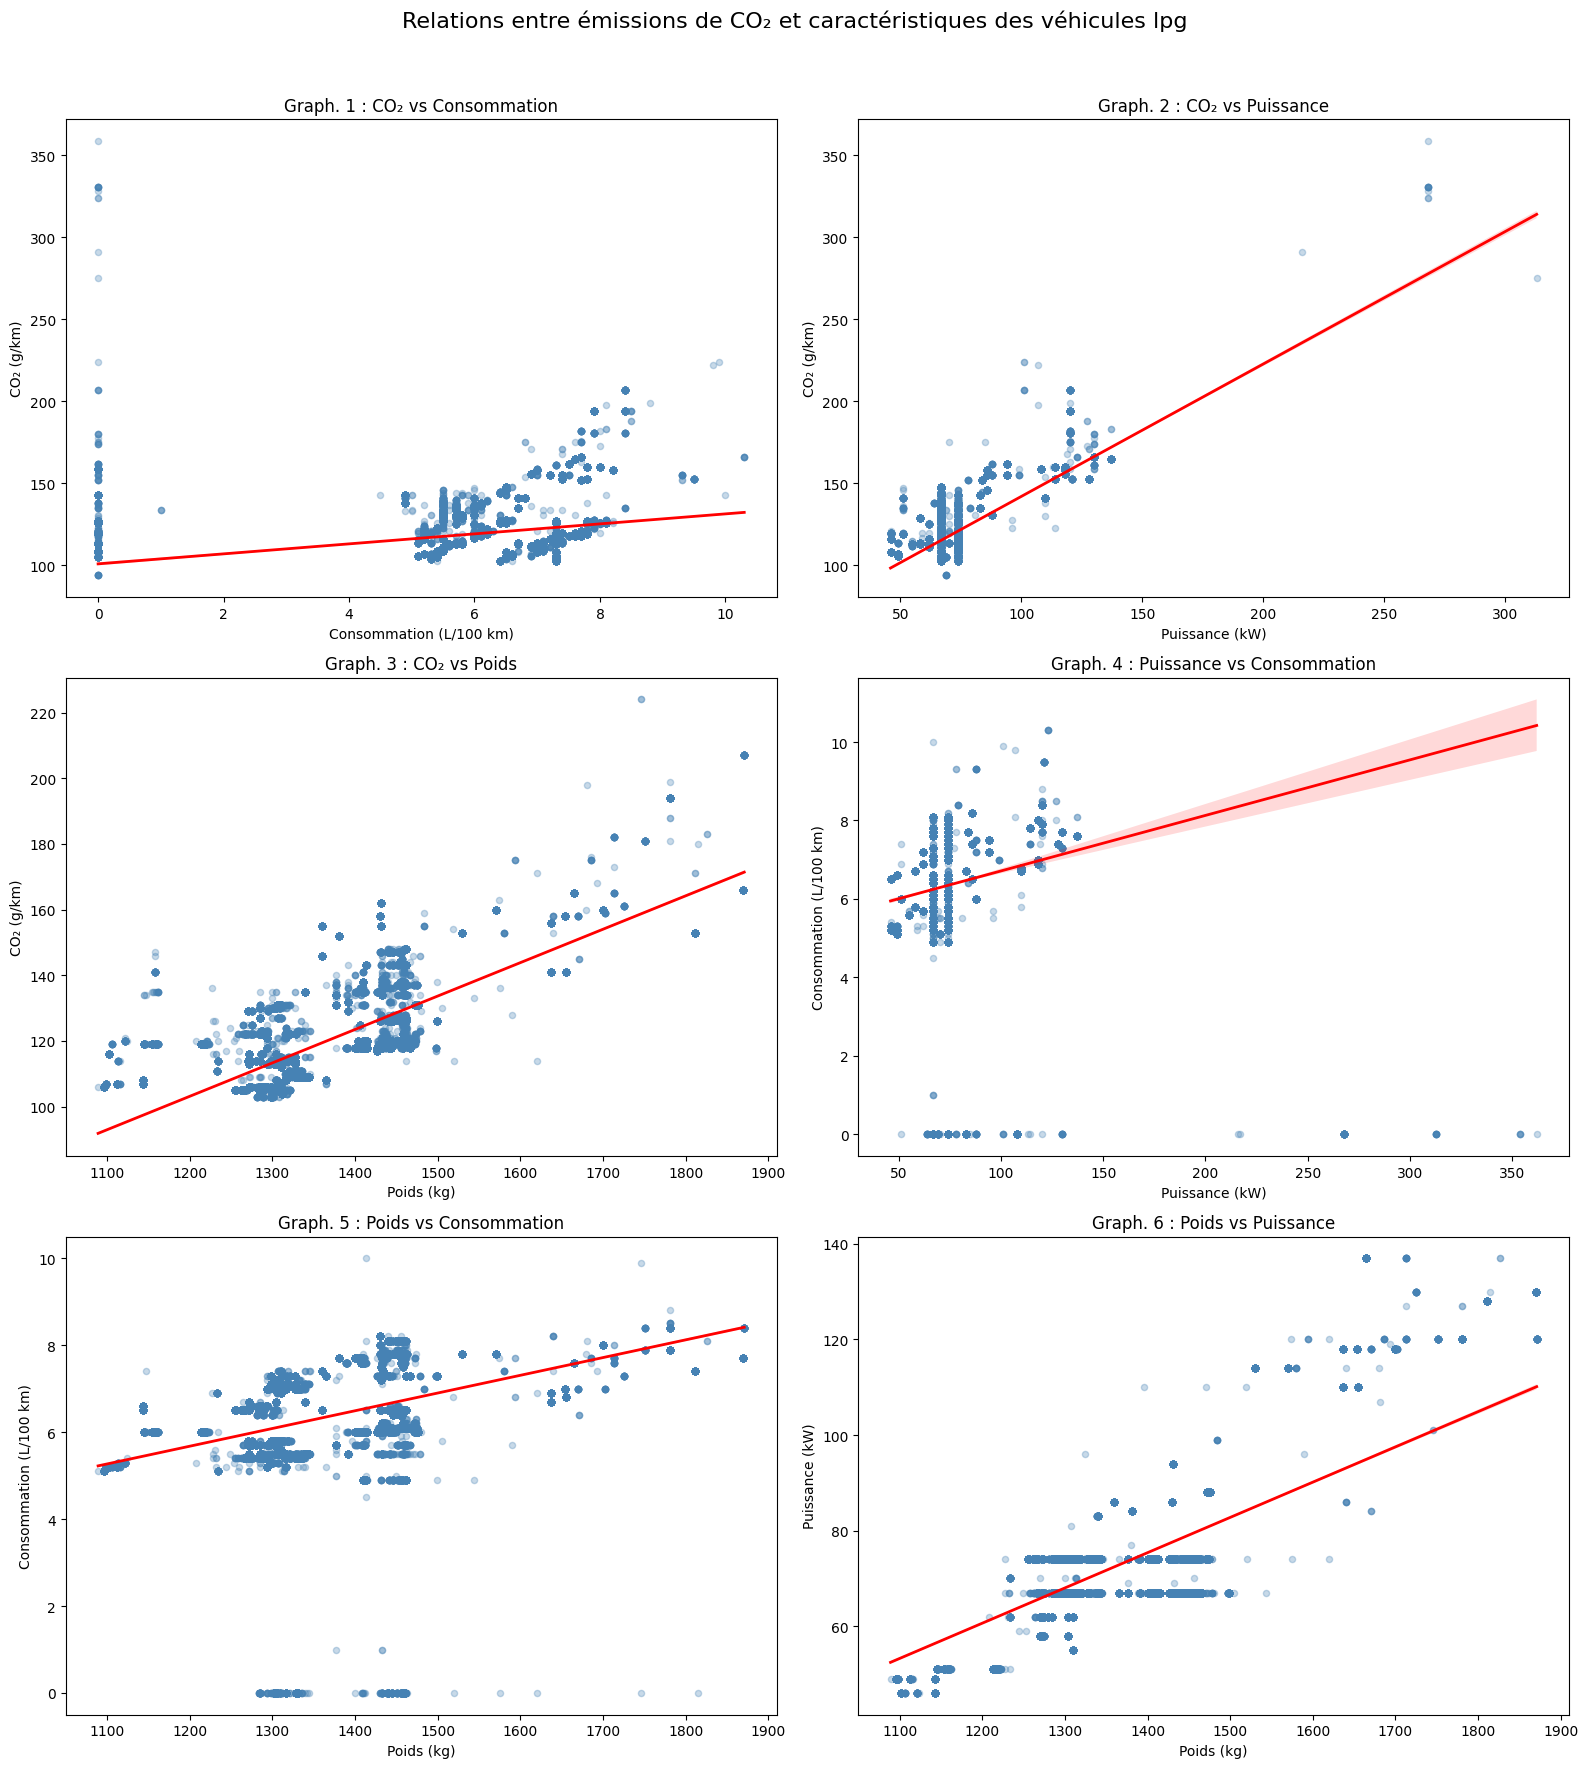

In [106]:
#Nuages de points avec droite de régression linéaire pour les véhicules thermiques

df_sample = df_emissions_2024_lpg.sample(100000)

# Création de la figure et de la grille
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

fig.suptitle(
    "Relations entre émissions de CO₂ et caractéristiques des véhicules lpg",
    fontsize=16
)

# Graphique 1 : CO2 vs Consommation
sns.regplot(
    x='Fuel consumption',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 0]
)
axes[0, 0].set_title('Graph. 1 : CO₂ vs Consommation')
axes[0, 0].set_xlabel('Consommation (L/100 km)')
axes[0, 0].set_ylabel('CO₂ (g/km)')

# Graphique 2 : CO2 vs Puissance
sns.regplot(
    x='Puissance_KW',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 1]
)
axes[0, 1].set_title('Graph. 2 : CO₂ vs Puissance')
axes[0, 1].set_xlabel('Puissance (kW)')
axes[0, 1].set_ylabel('CO₂ (g/km)')

# Graphique 3 : CO2 vs Poids
sns.regplot(
    x='WLTP_poids',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 0]
)
axes[1, 0].set_title('Graph. 3 : CO₂ vs Poids')
axes[1, 0].set_xlabel('Poids (kg)')
axes[1, 0].set_ylabel('CO₂ (g/km)')

# Graphique 4 : Puissance vs Consommation
sns.regplot(
    x='Puissance_KW',
    y='Fuel consumption',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 1]
)
axes[1, 1].set_title('Graph. 4 : Puissance vs Consommation')
axes[1, 1].set_xlabel('Puissance (kW)')
axes[1, 1].set_ylabel('Consommation (L/100 km)')

# Graphique 5 : Poids vs Consommation

sns.regplot(
    x='WLTP_poids',
    y='Fuel consumption',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2, 0]
)
axes[2, 0].set_title('Graph. 5 : Poids vs Consommation')
axes[2, 0].set_xlabel('Poids (kg)')
axes[2, 0].set_ylabel('Consommation (L/100 km)')

# Graphique 6 : Poids vs Puissance
sns.regplot(
    x='WLTP_poids',
    y='Puissance_KW',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2, 1]
)
axes[2, 1].set_title('Graph. 6 : Poids vs Puissance')
axes[2, 1].set_xlabel('Poids (kg)')
axes[2, 1].set_ylabel('Puissance (kW)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [107]:
df_emissions_2024_lpg_nv = df_emissions_2024_lpg[['Fuel consumption', 'Co2_Emission(WLTP)', 'Puissance_KW', 'WLTP_poids']]
df_emissions_2024_lpg_nv.head()

,Fuel consumption,Co2_Emission(WLTP),Puissance_KW,WLTP_poids
152,7.1,114.0,74.0,1310.0
191,7.8,120.0,74.0,1461.0
330,6.6,106.0,74.0,1284.0
583,6.6,106.0,74.0,1285.0
713,7.7,119.0,74.0,1407.0


In [108]:
df_emissions_2024_lpg_nv.describe()

,Fuel consumption,Co2_Emission(WLTP),Puissance_KW,WLTP_poids
count,321007.000000,320757.000000,321005.000000,319302.000000
mean,6.323855,120.270507,73.128574,1366.754903
std,1.166225,14.118668,12.216747,94.123250
min,0.000000,94.000000,46.000000,1089.000000
25%,5.800000,113.000000,67.000000,1304.000000
50%,6.100000,118.000000,74.000000,1316.000000
75%,7.100000,126.000000,74.000000,1450.000000
max,11.000000,370.000000,529.000000,1871.000000


In [109]:
df_emissions_2024_lpg_nv['Co2_Emission(WLTP)'].sum()
print(df_emissions_2024_lpg_nv['Co2_Emission(WLTP)'].sum())

38577607.0


In [110]:
df_emissions_2024_petrol = df_emissions_2024[df_emissions_2024['Type_Carburant'] == 'petrol']

df_emissions_2024_diesel = df_emissions_2024[df_emissions_2024['Type_Carburant'] == 'diesel']


on voit ici la somme totale des emissions de C02 pour toutes les voitures lpg qui est de 38 578 142 g/km

In [111]:
df_emissions_2024_diesel['Co2_Emission(WLTP)'].sum()
print(df_emissions_2024_diesel['Co2_Emission(WLTP)'].sum())

df_emissions_2024_petrol['Co2_Emission(WLTP)'].sum()
print(df_emissions_2024_petrol['Co2_Emission(WLTP)'].sum())



243577186.0
840084137.0


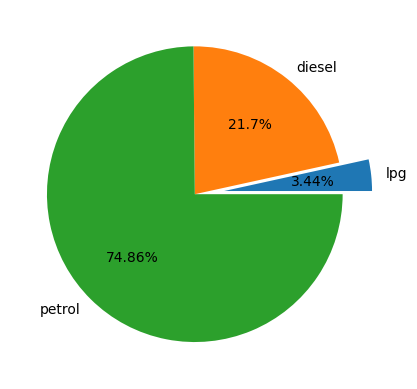

In [112]:
x = [38578142.0, 243577186.0, 840084137.0]
plt.pie(x, labels = ['lpg', 'diesel', 'petrol'], explode = [0.2,0,0], autopct = lambda x: str(round(x, 2)) + '%');

In [113]:
df_emissions_2024_diesel['Co2_Emission(WLTP)'].mean()
print(df_emissions_2024_diesel['Co2_Emission(WLTP)'].mean())

df_emissions_2024_petrol['Co2_Emission(WLTP)'].mean()
print(df_emissions_2024_petrol['Co2_Emission(WLTP)'].mean())

df_emissions_2024_lpg_nv['Co2_Emission(WLTP)'].mean()
print(df_emissions_2024_lpg_nv['Co2_Emission(WLTP)'].mean())

149.58702254025746
130.54865768239978
120.2705069569799


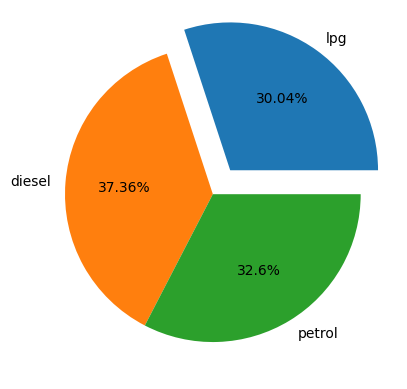

In [114]:
x = [120.2706750508946, 149.58702254025746, 130.54865768239978]
plt.pie(x, labels = ['lpg', 'diesel', 'petrol'], explode = [0.2,0,0], autopct = lambda x: str(round(x, 2)) + '%');

Visualisation 2024 Hybride.

In [115]:
df_emissions_2024_clean = pd.read_parquet('/content/drive/MyDrive/Data_Co2_Clean_AVEC_OUTLIERS_BEFORE_SAMPLE')
df_emissions_2024_clean.head(10)

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
0,148534149,FORD,FOCUS,1523.0,121.0,Essence,92.0,0.0,5.3,0.0,Netherlands,C,Q2_Moyen,Q2_Moyen
1,148534150,OPEL,VIVARO,2454.0,0.0,Electric,100.0,244.0,0.0,343.0,Netherlands,A,Q4_Très_lourd,Q2_Moyen
2,148534151,VOLVO,S60,2176.0,16.0,Hybride Essence,186.0,163.0,0.7,93.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
3,148534152,FORD,FOCUS,1549.0,123.0,Essence,92.0,0.0,5.4,0.0,Netherlands,C,Q2_Moyen,Q2_Moyen
4,148534153,TOYOTA,TOYOTA AYGO X,1088.0,108.0,Essence,53.0,0.0,4.8,0.0,Netherlands,B,Q1_Léger,Q1_Faible
5,148534154,DACIA,SANDERO,1262.0,125.0,Essence,81.0,0.0,5.5,0.0,Netherlands,C,Q1_Léger,Q2_Moyen
6,148534155,VOLKSWAGEN,TIGUAN,2033.0,10.0,Hybride Essence,110.0,178.0,0.4,117.0,Netherlands,A,Q4_Très_lourd,Q3_Puissant
7,148534156,VOLKSWAGEN,TAIGO,1335.0,125.0,Essence,70.0,0.0,5.6,0.0,Netherlands,C,Q1_Léger,Q1_Faible
8,148534157,VOLVO,C40,2203.0,0.0,Electric,185.0,166.0,0.0,570.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
9,148534158,VOLVO,XC60,2272.0,22.0,Hybride Essence,186.0,182.0,0.9,82.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant


In [116]:
valeurs_distinctes = df_emissions_2024_clean['Type_Carburant'].unique()
print(valeurs_distinctes)

['Essence' 'Electric' 'Hybride Essence' 'Autre' 'Hybride Diesel' 'Diesel']


In [117]:
df_emissions_2024_hybride = df_emissions_2024_clean[(df_emissions_2024_clean['Type_Carburant'] == 'Hybride Essence') | (df_emissions_2024_clean['Type_Carburant'] == 'Hybride Diesel')]
df_emissions_2024_hybride.head(10)

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
2,148534151,VOLVO,S60,2176.0,16.0,Hybride Essence,186.0,163.0,0.7,93.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
6,148534155,VOLKSWAGEN,TIGUAN,2033.0,10.0,Hybride Essence,110.0,178.0,0.4,117.0,Netherlands,A,Q4_Très_lourd,Q3_Puissant
9,148534158,VOLVO,XC60,2272.0,22.0,Hybride Essence,186.0,182.0,0.9,82.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
17,148534166,SKODA,KODIAQ,2061.0,10.0,Hybride Essence,110.0,176.0,0.5,114.0,Netherlands,A,Q4_Très_lourd,Q3_Puissant
21,148534170,MERCEDES-BENZ,C 300 E,2305.0,14.0,Hybride Essence,150.0,191.0,0.6,110.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
38,148534187,BMW,XM,2904.0,43.0,Hybride Essence,360.0,335.0,1.9,76.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
41,148534190,BMW,530E,2286.0,17.0,Hybride Essence,140.0,211.0,0.8,92.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
45,148534194,MERCEDES-BENZ,E 300 E,2461.0,14.0,Hybride Essence,150.0,196.0,0.6,108.0,Netherlands,A,Q4_Très_lourd,Q4_Très_Puissant
46,148534195,BMW,320E,1934.0,30.0,Hybride Essence,120.0,159.0,1.3,62.0,Netherlands,A,Q4_Très_lourd,Q3_Puissant
47,148534196,OPEL,ASTRA SPORTS TOURER,1843.0,30.0,Hybride Essence,110.0,164.0,1.3,57.0,Netherlands,A,Q3_Lourd,Q3_Puissant


In [118]:
display(df_emissions_2024_hybride.info())

<class 'pandas.core.frame.DataFrame'>
Index: 683494 entries, 2 to 10117211
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    683494 non-null  int64  
 1   Constructeur          683494 non-null  object 
 2   Model                 683494 non-null  object 
 3   WLTP_poids            683494 non-null  float64
 4   Co2_Emission(WLTP)    683494 non-null  float64
 5   Type_Carburant        683494 non-null  object 
 6   Puissance_KW          683494 non-null  float64
 7   Conso_Wh/km           683494 non-null  float64
 8   Fuel consumption      683494 non-null  float64
 9   Electric range (km)   683494 non-null  float64
 10  Pays                  683494 non-null  object 
 11  Etiquette_CO2         683494 non-null  object 
 12  Poids_Quartile        683494 non-null  object 
 13  PuissanceKW_Quartile  683494 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 78.2+ 

None

In [119]:
missing_rate = df_emissions_2024_hybride.isna().mean()
missing_rate

,0
ID,0.0
Constructeur,0.0
Model,0.0
WLTP_poids,0.0
Co2_Emission(WLTP),0.0
Type_Carburant,0.0
Puissance_KW,0.0
Conso_Wh/km,0.0
Fuel consumption,0.0
Electric range (km),0.0


In [120]:
df_emissions_2024_hybride.isnull().sum(axis=0)

,0
ID,0
Constructeur,0
Model,0
WLTP_poids,0
Co2_Emission(WLTP),0
Type_Carburant,0
Puissance_KW,0
Conso_Wh/km,0
Fuel consumption,0
Electric range (km),0


In [121]:
count_zero_values_Conso_Wh_km = df_emissions_2024_hybride[df_emissions_2024_hybride['Conso_Wh/km'] == 0].shape[0]
print(count_zero_values_Conso_Wh_km)
count_zero_values_FC = df_emissions_2024_hybride[df_emissions_2024_hybride['Fuel consumption'] == 0].shape[0]
print(count_zero_values_FC)
count_zero_values_ER = df_emissions_2024_hybride[df_emissions_2024_hybride['Electric range (km)'] == 0].shape[0]
print(count_zero_values_ER)

1243
213
1418


In [122]:
df_emissions_2024_hybride_clean = df_emissions_2024_hybride.drop(df_emissions_2024_hybride[(df_emissions_2024_hybride['Conso_Wh/km'] == 0)].index)
df_emissions_2024_hybride_clean = df_emissions_2024_hybride.drop(df_emissions_2024_hybride[(df_emissions_2024_hybride['Fuel consumption'] == 0.00)].index)
df_emissions_2024_hybride_clean = df_emissions_2024_hybride.drop(df_emissions_2024_hybride[(df_emissions_2024_hybride['Electric range (km)'] == 0)].index)

In [123]:
count_zero_values_Conso_Wh_km = df_emissions_2024_hybride_clean[df_emissions_2024_hybride_clean['Conso_Wh/km'] == 0].shape[0]
print(count_zero_values_Conso_Wh_km)
count_zero_values_FC = df_emissions_2024_hybride_clean[df_emissions_2024_hybride_clean['Fuel consumption'] ==0].shape[0]
print(count_zero_values_FC)
count_zero_values_ER = df_emissions_2024_hybride_clean[df_emissions_2024_hybride_clean['Electric range (km)'] == 0].shape[0]
print(count_zero_values_ER)

0
213
0


Identification des variables a étudiées:

Liste de variables a etudier pour diesel ou essence/ELectric ( véhicules hybrides).

- WLTP_Poids
- CO2_Emmision(WLTP)
- Puisssance_Kw
- Conso_Wh/km
- Fuel consumption
- Electric range (km)




In [124]:
variables_etudiees = ['WLTP_poids', 'Co2_Emission(WLTP)','Puissance_KW', 'Conso_Wh/km', 'Fuel consumption' , 'Electric range (km)']
df_emissions_2024_hybride_clean[variables_etudiees].describe()

,WLTP_poids,Co2_Emission(WLTP),Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km)
count,682076.000000,682076.000000,682076.000000,682076.000000,682076.000000,682076.000000
mean,2196.595708,25.939027,153.264456,193.823753,1.392900,78.312072
std,315.858753,15.217297,61.673764,41.580963,1.459089,24.181865
min,1084.000000,6.000000,15.000000,14.000000,0.000000,11.000000
25%,1949.000000,18.000000,110.000000,168.000000,0.800000,61.000000
50%,2159.000000,24.000000,135.000000,184.000000,1.100000,74.000000
75%,2385.000000,32.000000,186.000000,210.000000,1.400000,91.000000
max,3960.000000,404.000000,607.000000,430.000000,26.000000,702.000000


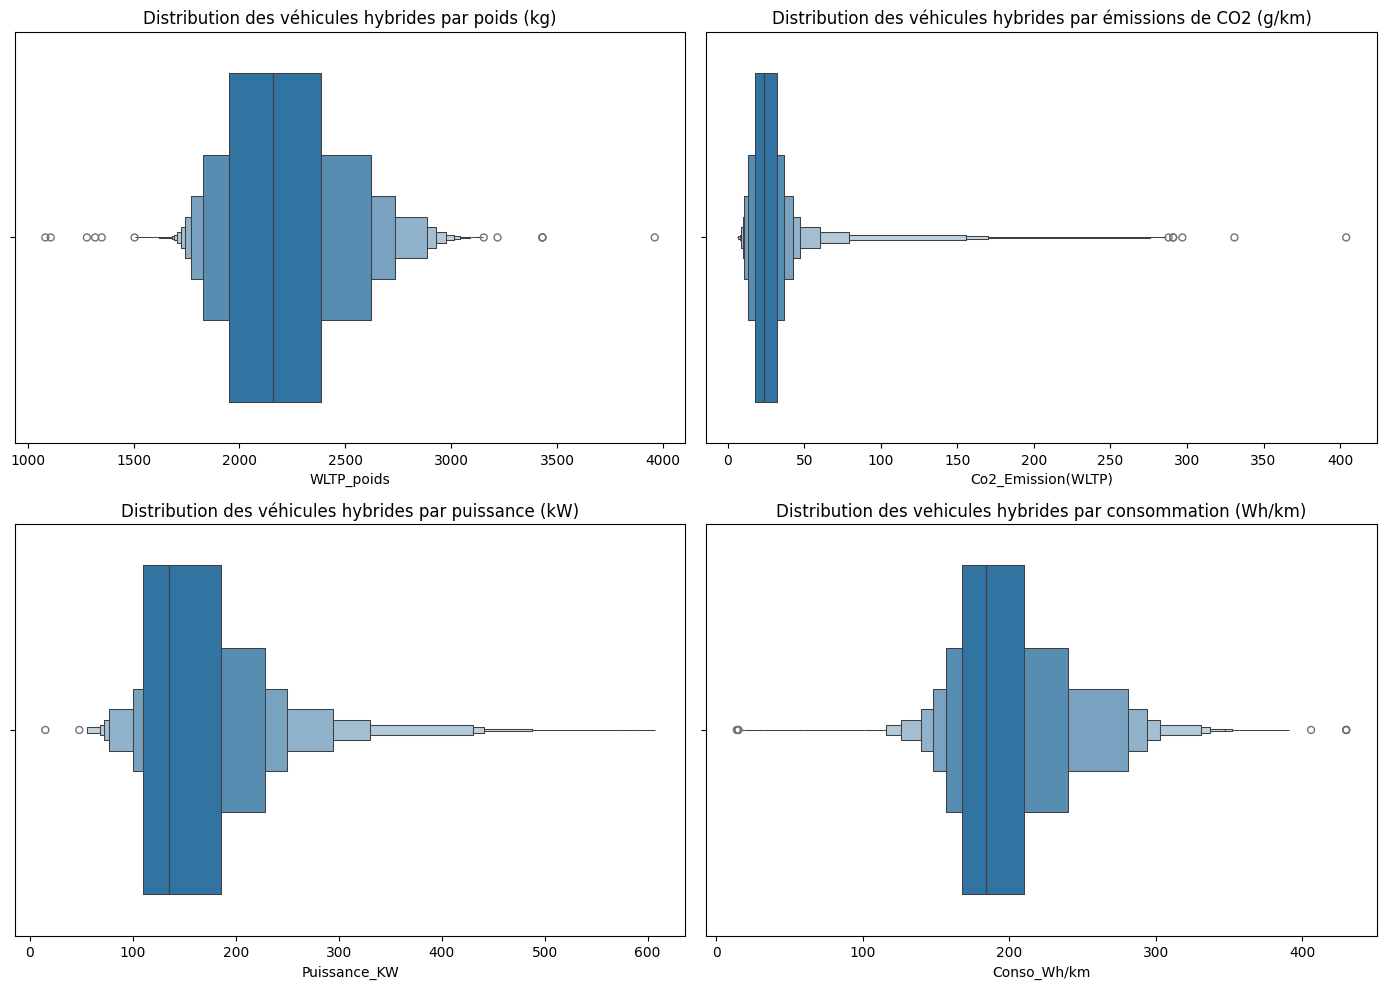

In [125]:
colonnes = ['WLTP_poids', 'Co2_Emission(WLTP)', 'Puissance_KW','Conso_Wh/km']
titres = [
    'Distribution des véhicules hybrides par poids (kg)',
    'Distribution des véhicules hybrides par émissions de CO2 (g/km)',
    'Distribution des véhicules hybrides par puissance (kW)',
    'Distribution des vehicules hybrides par consommation (Wh/km)'
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes = axes.flatten()

for i, col in enumerate(colonnes):
    sns.boxenplot(x=col, data=df_emissions_2024_hybride_clean, ax=axes[i])
    axes[i].set_title(titres[i])

plt.tight_layout()
plt.show()

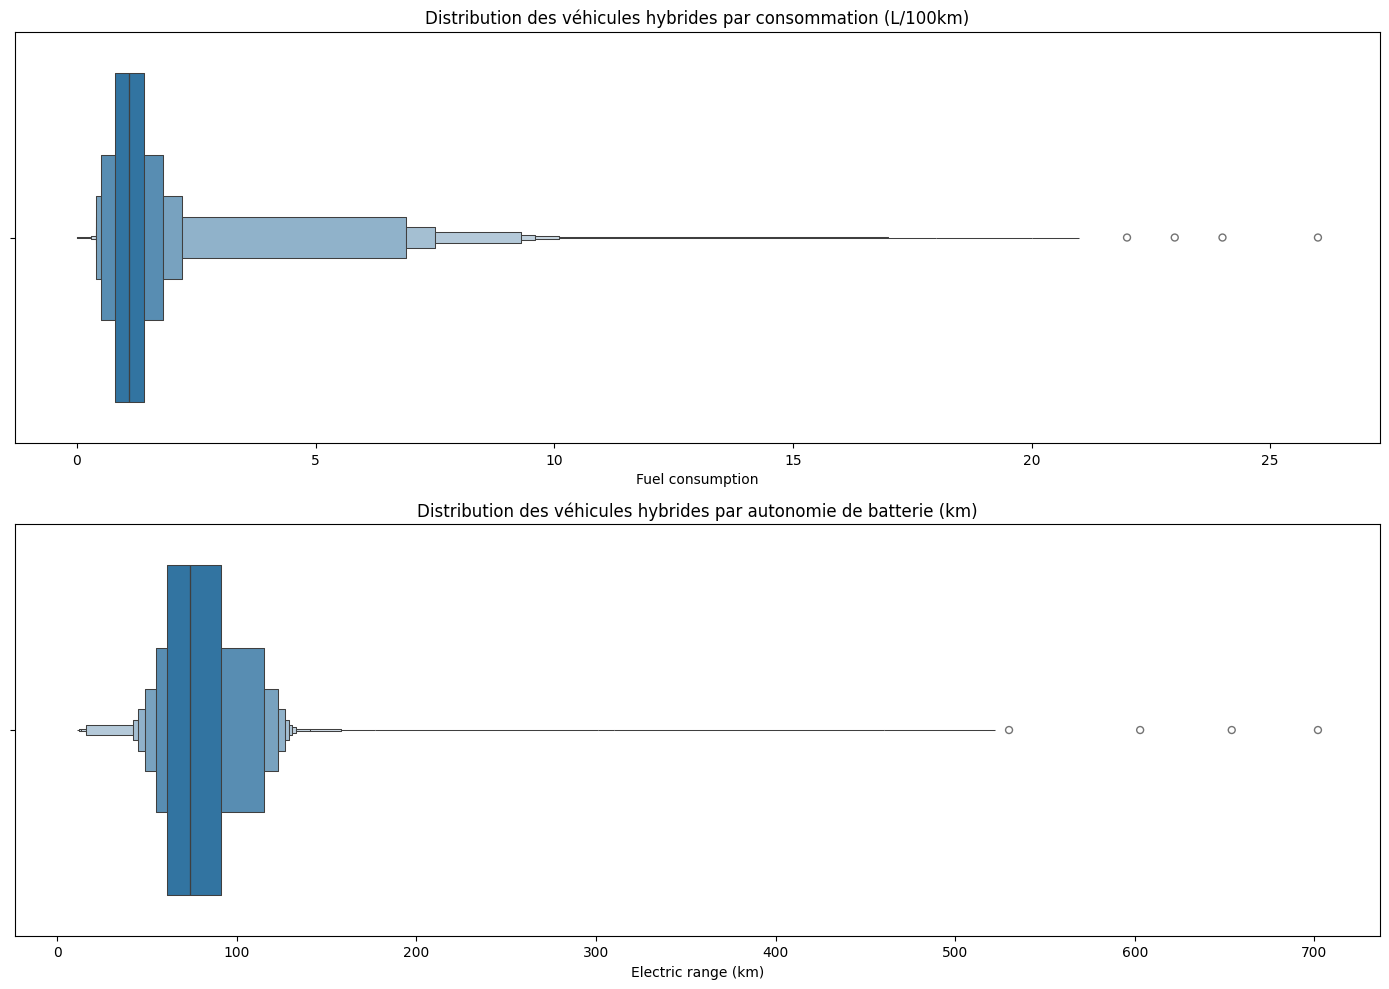

In [126]:
colonnes = ['Fuel consumption', 'Electric range (km)']
titres = [
    'Distribution des véhicules hybrides par consommation (L/100km)',
    'Distribution des véhicules hybrides par autonomie de batterie (km)'
]

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes = axes.flatten()

for i, col in enumerate(colonnes):
    sns.boxenplot(x=col, data=df_emissions_2024_hybride_clean, ax=axes[i])
    axes[i].set_title(titres[i])

plt.tight_layout()
plt.show()

# Analyse des boites a moustaches et nettoyage des outliers.

**Poids**

**Emissions de CO2**

**Puissance**

**Consommation (Wh/km)**

**Consommation (L/100KM)**

**autonomie de batterie**





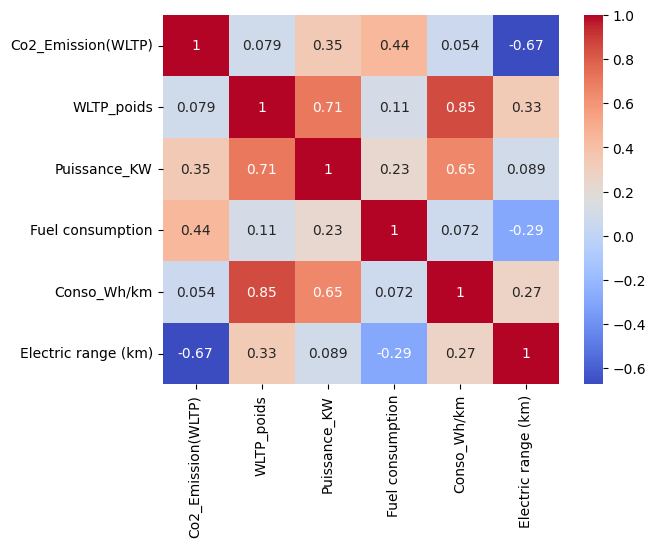

In [127]:
# Matrice de corrélation (heatmap) entre les variables numériques pour voitures hybrides

numeric_vars = ['Co2_Emission(WLTP)', 'WLTP_poids', 'Puissance_KW', 'Fuel consumption', 'Conso_Wh/km', 'Electric range (km)' ]
corr_matrix = df_emissions_2024_hybride_clean[numeric_vars].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

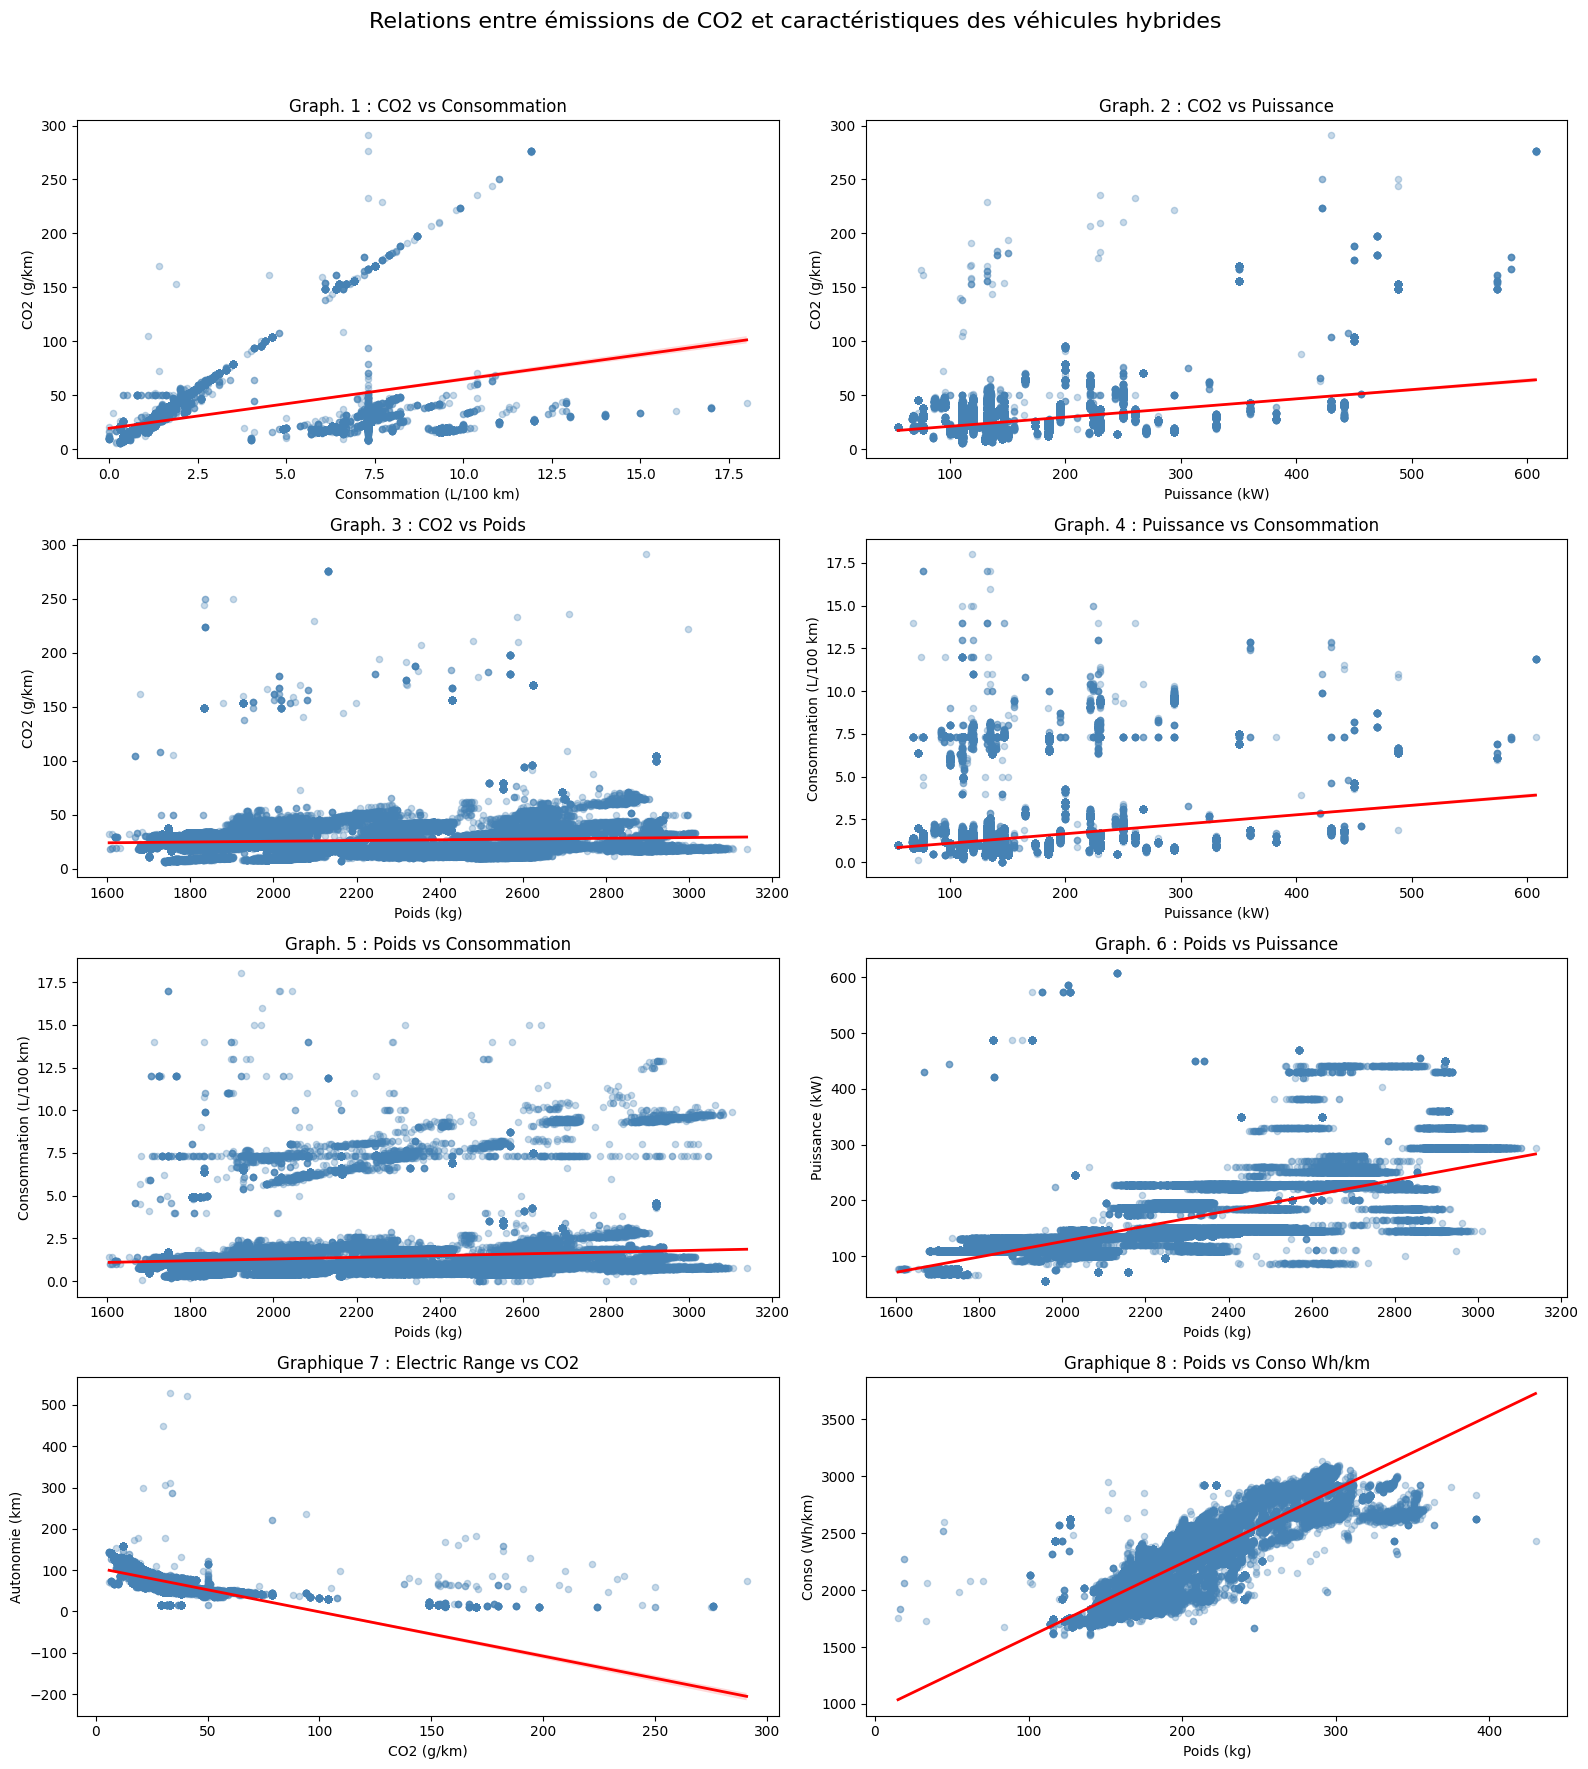

In [128]:
#Nuages de points avec droite de régression linéaire pour les véhicules thermiques

df_sample = df_emissions_2024_hybride_clean.sample(100000)

# Création de la figure et de la grille
fig, axes = plt.subplots(4, 2, figsize=(16, 18))

fig.suptitle(
    "Relations entre émissions de CO2 et caractéristiques des véhicules hybrides",
    fontsize=16
)

# Graphique 1 : CO2 vs Consommation
sns.regplot(
    x='Fuel consumption',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 0]
)
axes[0, 0].set_title('Graph. 1 : CO2 vs Consommation')
axes[0, 0].set_xlabel('Consommation (L/100 km)')
axes[0, 0].set_ylabel('CO2 (g/km)')

# Graphique 2 : CO2 vs Puissance
sns.regplot(
    x='Puissance_KW',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 1]
)
axes[0, 1].set_title('Graph. 2 : CO2 vs Puissance')
axes[0, 1].set_xlabel('Puissance (kW)')
axes[0, 1].set_ylabel('CO2 (g/km)')

# Graphique 3 : CO2 vs Poids
sns.regplot(
    x='WLTP_poids',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 0]
)
axes[1, 0].set_title('Graph. 3 : CO2 vs Poids')
axes[1, 0].set_xlabel('Poids (kg)')
axes[1, 0].set_ylabel('CO2 (g/km)')

# Graphique 4 : Puissance vs Consommation
sns.regplot(
    x='Puissance_KW',
    y='Fuel consumption',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 1]
)
axes[1, 1].set_title('Graph. 4 : Puissance vs Consommation')
axes[1, 1].set_xlabel('Puissance (kW)')
axes[1, 1].set_ylabel('Consommation (L/100 km)')

# Graphique 5 : Poids vs Consommation

sns.regplot(
    x='WLTP_poids',
    y='Fuel consumption',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2, 0]
)
axes[2, 0].set_title('Graph. 5 : Poids vs Consommation')
axes[2, 0].set_xlabel('Poids (kg)')
axes[2, 0].set_ylabel('Consommation (L/100 km)')

# Graphique 6 : Poids vs Puissance
sns.regplot(
    x='WLTP_poids',
    y='Puissance_KW',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2, 1]
)
axes[2, 1].set_title('Graph. 6 : Poids vs Puissance')
axes[2, 1].set_xlabel('Poids (kg)')
axes[2, 1].set_ylabel('Puissance (kW)')

# Graphique 7 : Electric Range vs CO2
sns.regplot(
    x='Co2_Emission(WLTP)',
    y='Electric range (km)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[3, 0]
)
axes[3, 0].set_title('Graphique 7 : Electric Range vs CO2')
axes[3, 0].set_xlabel('CO2 (g/km)')
axes[3, 0].set_ylabel('Autonomie (km)')
# Graphique 8 : Poids vs Conso Wh/km
sns.regplot(
    x='Conso_Wh/km',
    y='WLTP_poids',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[3, 1]
)
axes[3, 1].set_title('Graphique 8 : Poids vs Conso Wh/km')
axes[3, 1].set_xlabel('Poids (kg)')
axes[3, 1].set_ylabel('Conso (Wh/km)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Visualisation 2024 Autres type de carburants

In [129]:
df_emissions_2024_autres = df_emissions_2024_clean[(df_emissions_2024_clean['Type_Carburant'] == 'Autre')]
df_emissions_2024_autres.head(10)

,ID,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,Fuel consumption,Electric range (km),Pays,Etiquette_CO2,Poids_Quartile,PuissanceKW_Quartile
152,148534301,DACIA,SANDERO,1310.0,114.0,Autre,74.0,0.0,7.1,0.0,Netherlands,B,Q1_Léger,Q1_Faible
191,148534340,DACIA,JOGGER,1461.0,120.0,Autre,74.0,0.0,7.8,0.0,Netherlands,B,Q2_Moyen,Q1_Faible
330,148534479,DACIA,SANDERO,1284.0,106.0,Autre,74.0,0.0,6.6,0.0,Netherlands,B,Q1_Léger,Q1_Faible
583,148534732,DACIA,SANDERO,1285.0,106.0,Autre,74.0,0.0,6.6,0.0,Netherlands,B,Q1_Léger,Q1_Faible
713,148534862,DACIA,JOGGER,1407.0,119.0,Autre,74.0,0.0,7.7,0.0,Netherlands,B,Q2_Moyen,Q1_Faible
716,148534865,DACIA,JOGGER,1460.0,120.0,Autre,74.0,0.0,7.8,0.0,Netherlands,B,Q2_Moyen,Q1_Faible
1060,148535209,DACIA,SANDERO,1285.0,106.0,Autre,74.0,0.0,6.6,0.0,Netherlands,B,Q1_Léger,Q1_Faible
1210,148535359,DACIA,SANDERO,1310.0,114.0,Autre,74.0,0.0,7.1,0.0,Netherlands,B,Q1_Léger,Q1_Faible
1425,148535574,DACIA,SANDERO,1308.0,114.0,Autre,74.0,0.0,7.1,0.0,Netherlands,B,Q1_Léger,Q1_Faible
1466,148535615,DACIA,SANDERO,1285.0,106.0,Autre,74.0,0.0,6.6,0.0,Netherlands,B,Q1_Léger,Q1_Faible


In [130]:
display(df_emissions_2024_autres.info())

<class 'pandas.core.frame.DataFrame'>
Index: 323001 entries, 152 to 10117127
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    323001 non-null  int64  
 1   Constructeur          323001 non-null  object 
 2   Model                 323001 non-null  object 
 3   WLTP_poids            323001 non-null  float64
 4   Co2_Emission(WLTP)    323001 non-null  float64
 5   Type_Carburant        323001 non-null  object 
 6   Puissance_KW          323001 non-null  float64
 7   Conso_Wh/km           323001 non-null  float64
 8   Fuel consumption      323001 non-null  float64
 9   Electric range (km)   323001 non-null  float64
 10  Pays                  323001 non-null  object 
 11  Etiquette_CO2         323001 non-null  object 
 12  Poids_Quartile        323001 non-null  object 
 13  PuissanceKW_Quartile  323001 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 37.0

None

In [131]:
missing_rate = df_emissions_2024_autres.isna().mean()
missing_rate

,0
ID,0.0
Constructeur,0.0
Model,0.0
WLTP_poids,0.0
Co2_Emission(WLTP),0.0
Type_Carburant,0.0
Puissance_KW,0.0
Conso_Wh/km,0.0
Fuel consumption,0.0
Electric range (km),0.0


In [132]:
df_emissions_2024_hybride.isnull().sum(axis=0)

,0
ID,0
Constructeur,0
Model,0
WLTP_poids,0
Co2_Emission(WLTP),0
Type_Carburant,0
Puissance_KW,0
Conso_Wh/km,0
Fuel consumption,0
Electric range (km),0


Identification des variables a étudiées:

Liste de variables a etudier pour vehicules à autres types de carburants

WLTP_Poids

CO2_Emmision(WLTP)

Conso_Wh/km

Fuel consumption


In [133]:
variables_etudiees_autres = ['WLTP_poids', 'Co2_Emission(WLTP)','Puissance_KW', 'Fuel consumption']
df_emissions_2024_autres[variables_etudiees_autres].describe()

,WLTP_poids,Co2_Emission(WLTP),Puissance_KW,Fuel consumption
count,323001.000000,323001.000000,323001.000000,323001.000000
mean,1369.728834,119.723540,73.094387,6.321587
std,101.437643,14.917109,11.233485,1.156461
min,1089.000000,0.000000,31.000000,0.000000
25%,1304.000000,113.000000,67.000000,5.700000
50%,1319.000000,116.000000,74.000000,6.100000
75%,1451.000000,126.000000,74.000000,7.100000
max,3200.000000,274.000000,150.000000,17.000000


In [134]:
count_zero_values_FC_autres = df_emissions_2024_autres[df_emissions_2024_autres['Fuel consumption'] == 0].shape[0]
print(count_zero_values_FC_autres)

4931


In [135]:
df_emissions_2024_autres_clean = df_emissions_2024_autres.drop(df_emissions_2024_autres[(df_emissions_2024_autres['Fuel consumption'] == 0.00)].index)

In [136]:
count_zero_values_FC_autres_clean = df_emissions_2024_autres_clean[df_emissions_2024_autres_clean['Fuel consumption'] == 0].shape[0]
print(count_zero_values_FC_autres)

4931


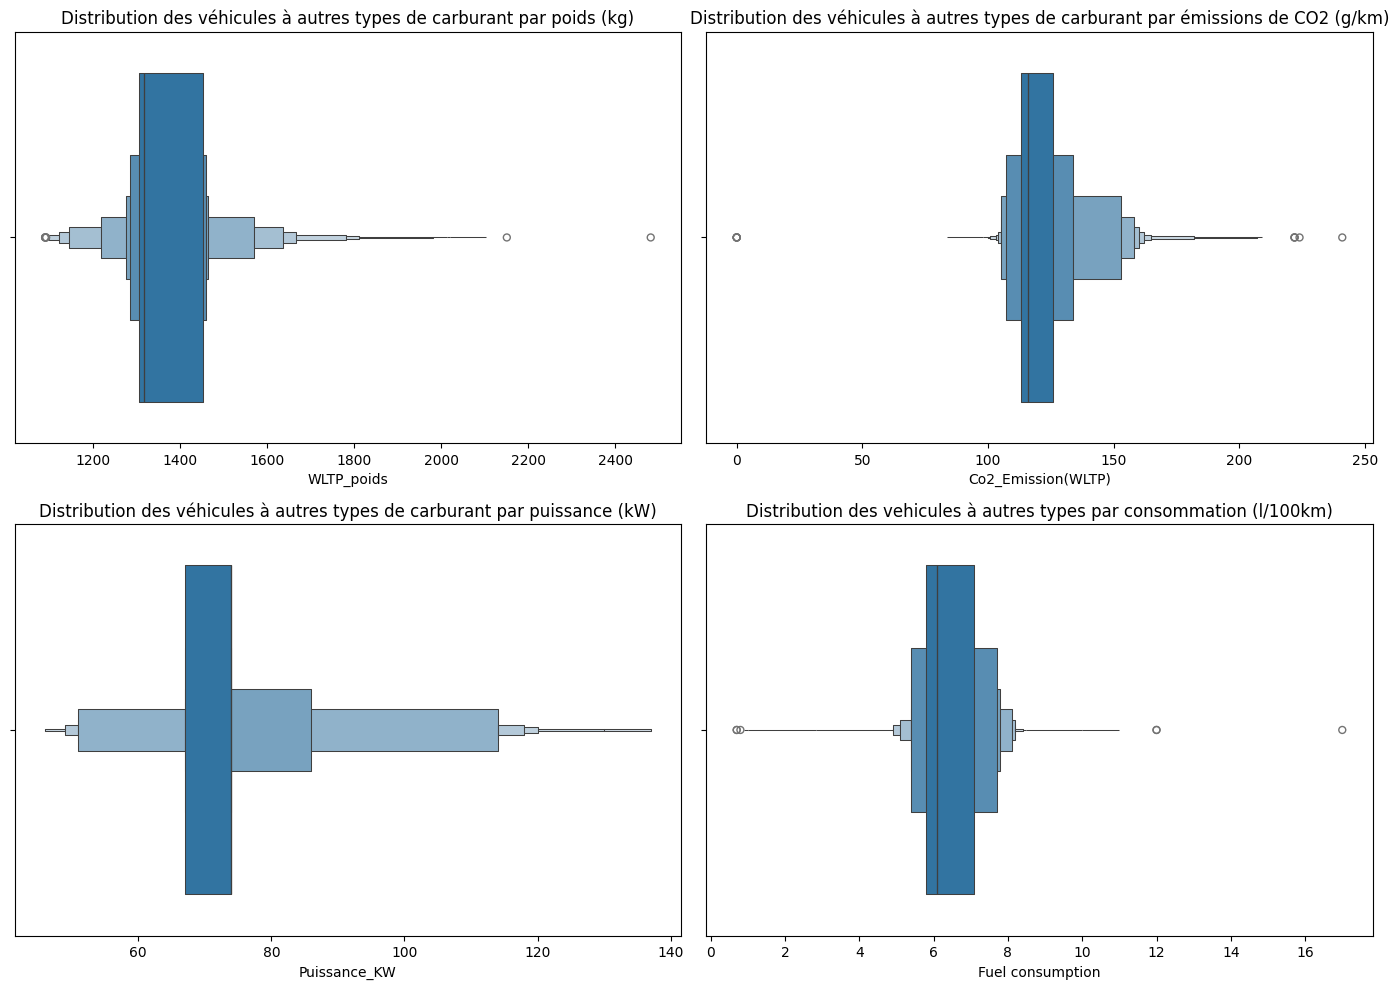

In [137]:
colonnes = ['WLTP_poids', 'Co2_Emission(WLTP)', 'Puissance_KW','Fuel consumption']
titres = [
    'Distribution des véhicules à autres types de carburant par poids (kg)',
    'Distribution des véhicules à autres types de carburant par émissions de CO2 (g/km)',
    'Distribution des véhicules à autres types de carburant par puissance (kW)',
    'Distribution des vehicules à autres types par consommation (l/100km)'
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes = axes.flatten()

for i, col in enumerate(colonnes):
    sns.boxenplot(x=col, data=df_emissions_2024_autres_clean, ax=axes[i])
    axes[i].set_title(titres[i])

plt.tight_layout()
plt.show()

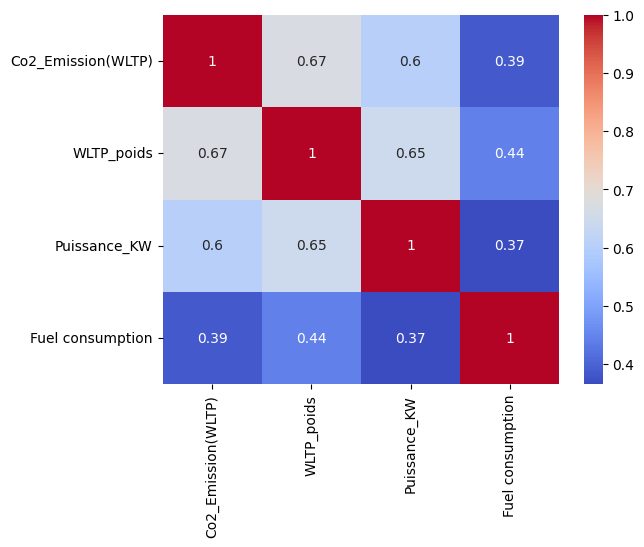

In [138]:
numeric_vars_autres = ['Co2_Emission(WLTP)', 'WLTP_poids', 'Puissance_KW', 'Fuel consumption']
corr_matrix = df_emissions_2024_autres_clean[numeric_vars_autres].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

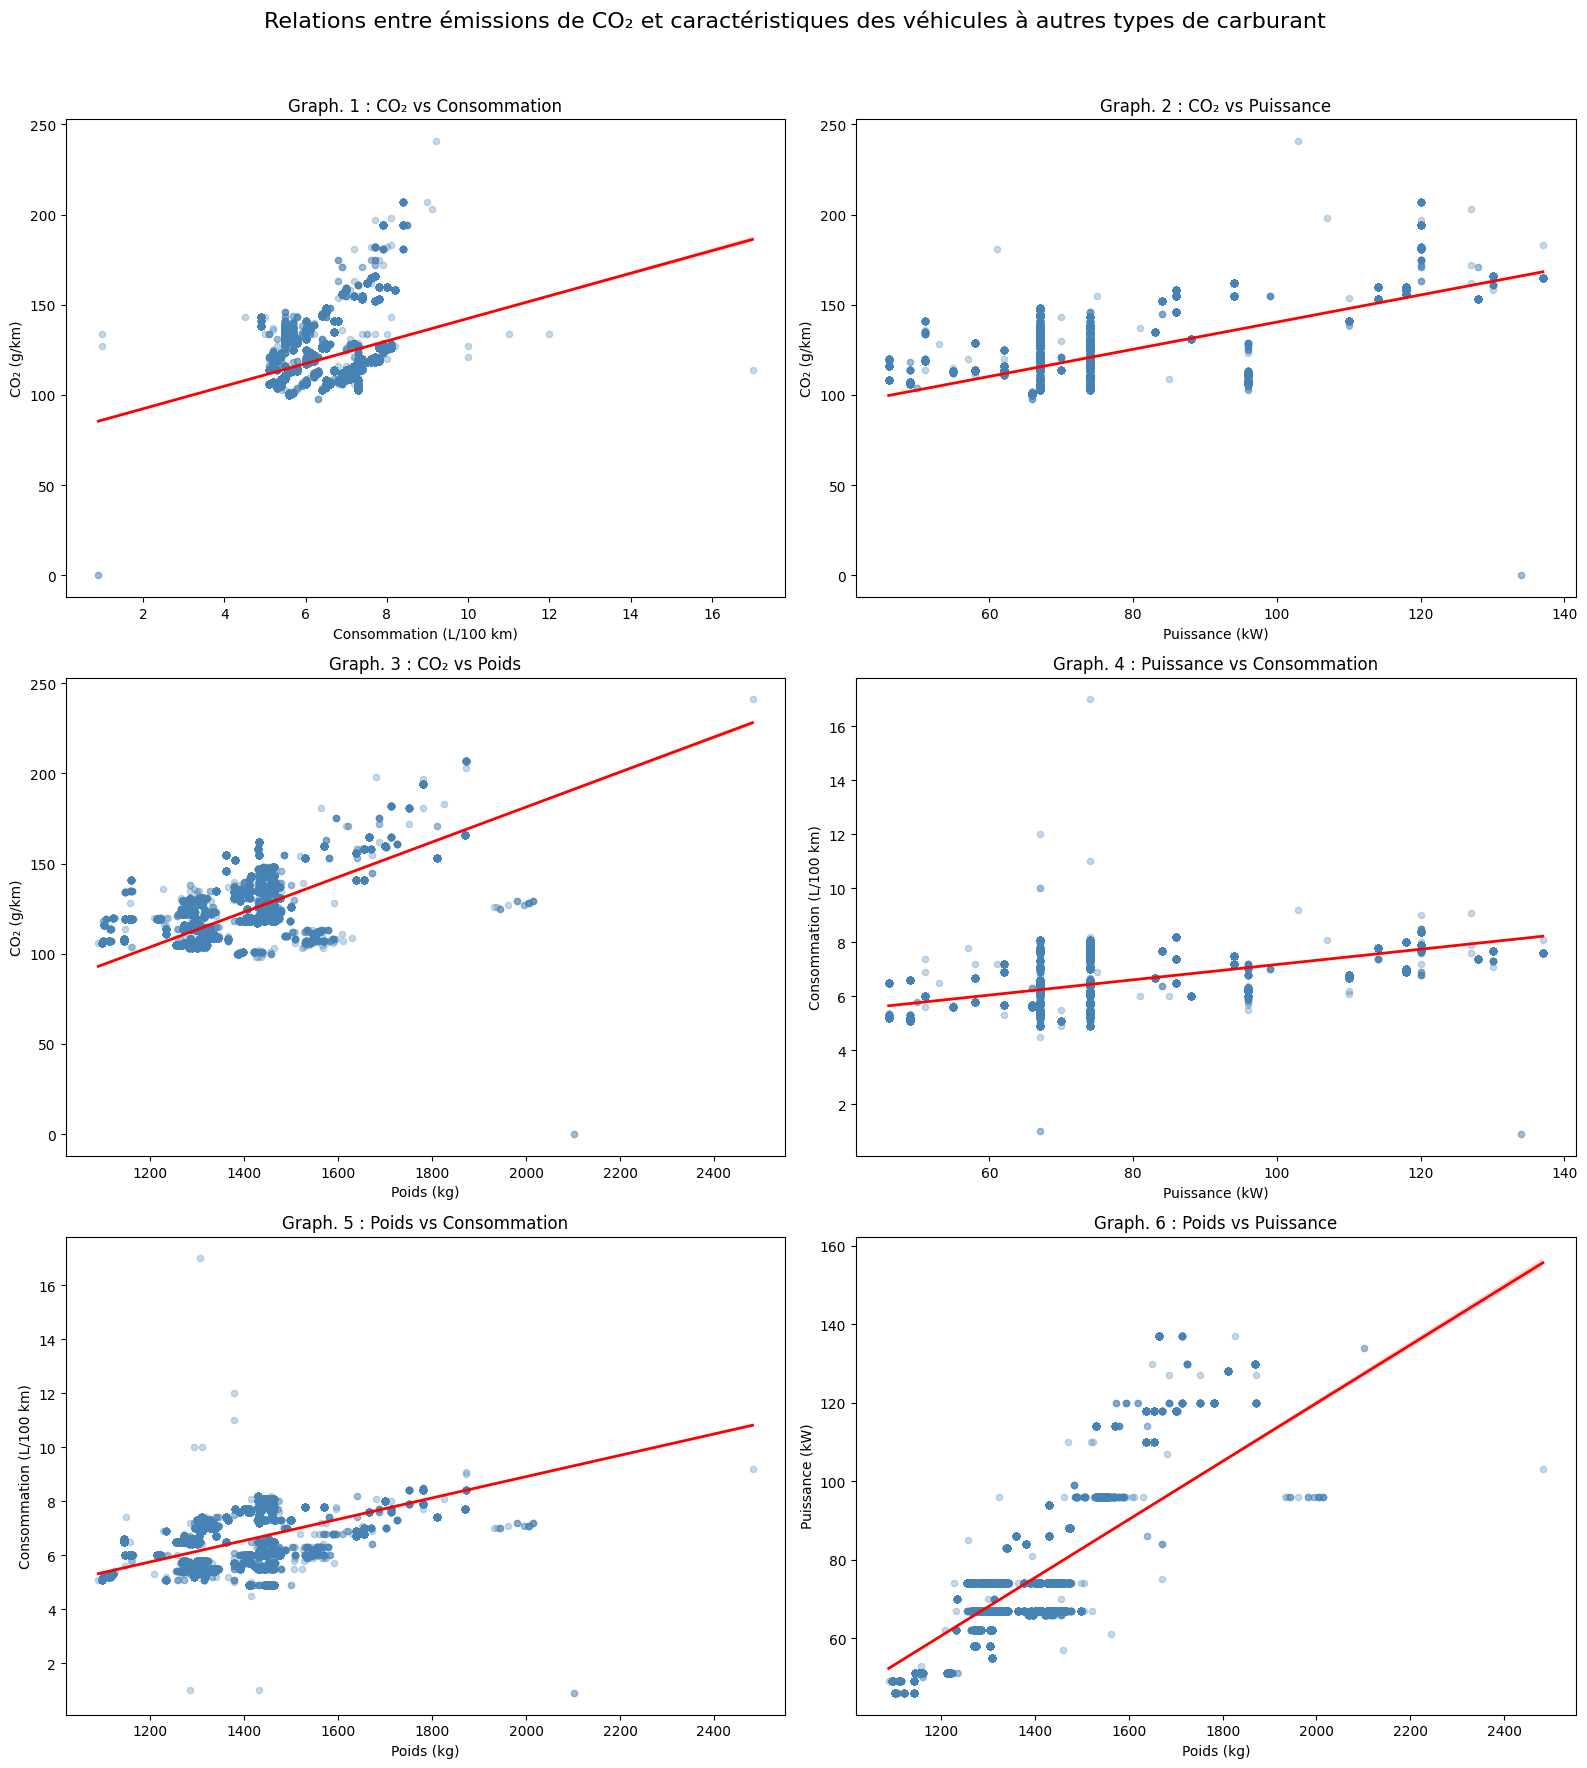

In [139]:
#Nuages de points avec droite de régression linéaire pour les véhicules thermiques

df_sample = df_emissions_2024_autres_clean.sample(100000)

# Création de la figure et de la grille
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

fig.suptitle(
    "Relations entre émissions de CO₂ et caractéristiques des véhicules à autres types de carburant",
    fontsize=16
)

# Graphique 1 : CO2 vs Consommation
sns.regplot(
    x='Fuel consumption',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 0]
)
axes[0, 0].set_title('Graph. 1 : CO₂ vs Consommation')
axes[0, 0].set_xlabel('Consommation (L/100 km)')
axes[0, 0].set_ylabel('CO₂ (g/km)')

# Graphique 2 : CO2 vs Puissance
sns.regplot(
    x='Puissance_KW',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[0, 1]
)
axes[0, 1].set_title('Graph. 2 : CO₂ vs Puissance')
axes[0, 1].set_xlabel('Puissance (kW)')
axes[0, 1].set_ylabel('CO₂ (g/km)')

# Graphique 3 : CO2 vs Poids
sns.regplot(
    x='WLTP_poids',
    y='Co2_Emission(WLTP)',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 0]
)
axes[1, 0].set_title('Graph. 3 : CO₂ vs Poids')
axes[1, 0].set_xlabel('Poids (kg)')
axes[1, 0].set_ylabel('CO₂ (g/km)')

# Graphique 4 : Puissance vs Consommation
sns.regplot(
    x='Puissance_KW',
    y='Fuel consumption',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[1, 1]
)
axes[1, 1].set_title('Graph. 4 : Puissance vs Consommation')
axes[1, 1].set_xlabel('Puissance (kW)')
axes[1, 1].set_ylabel('Consommation (L/100 km)')

# Graphique 5 : Poids vs Consommation

sns.regplot(
    x='WLTP_poids',
    y='Fuel consumption',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2, 0]
)
axes[2, 0].set_title('Graph. 5 : Poids vs Consommation')
axes[2, 0].set_xlabel('Poids (kg)')
axes[2, 0].set_ylabel('Consommation (L/100 km)')

# Graphique 6 : Poids vs Puissance
sns.regplot(
    x='WLTP_poids',
    y='Puissance_KW',
    data=df_sample,
    scatter_kws={'alpha':0.3, 's':20, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2},
    ax=axes[2, 1]
)
axes[2, 1].set_title('Graph. 6 : Poids vs Puissance')
axes[2, 1].set_xlabel('Poids (kg)')
axes[2, 1].set_ylabel('Puissance (kW)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()